In [43]:
import numpy as np
import pandas as pd
data={'ID':[1,2,3,4,5],
      'Name':["Aryan","Srijan","Ashish","Ojash","Prabesh"],
      'Age':[25,20,33,34,31],
      'Location':['Kathmandu','Kathmandu','Pokhara','Pokhara','Butwal'],
      'Genderr':['Male','Male','Female','Female','Male']
     }
df=pd.DataFrame(data)
print(df)
unique=df['Location'].unique()
print('\nUnique elements in Location are: ',unique)
df.describe()


   ID     Name  Age   Location Genderr
0   1    Aryan   25  Kathmandu    Male
1   2   Srijan   20  Kathmandu    Male
2   3   Ashish   33    Pokhara  Female
3   4    Ojash   34    Pokhara  Female
4   5  Prabesh   31     Butwal    Male

Unique elements in Location are:  ['Kathmandu' 'Pokhara' 'Butwal']


,ID,Age
count,5.000000,5.00000
mean,3.000000,28.60000
std,1.581139,5.94138
min,1.000000,20.00000
25%,2.000000,25.00000
50%,3.000000,31.00000
75%,4.000000,33.00000
max,5.000000,34.00000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5 non-null      int64 
 1   Name      5 non-null      object
 2   Age       5 non-null      int64 
 3   Location  5 non-null      object
 4   Genderr   5 non-null      object
dtypes: int64(2), object(3)
memory usage: 328.0+ bytes


In [45]:
!pip install scikit-learn

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genderr']=le.fit_transform(df['Genderr']) #Does label encoding
print(df)

   ID     Name  Age   Location  Genderr
0   1    Aryan   25  Kathmandu        1
1   2   Srijan   20  Kathmandu        1
2   3   Ashish   33    Pokhara        0
3   4    Ojash   34    Pokhara        0
4   5  Prabesh   31     Butwal        1


In [47]:
value={'Kathmandu':101,
       'Pokhara':103,
       'Butwal':105
      }
df['Location']=df['Location'].map(value)  
print(df)
       

   ID     Name  Age  Location  Genderr
0   1    Aryan   25       101        1
1   2   Srijan   20       101        1
2   3   Ashish   33       103        0
3   4    Ojash   34       103        0
4   5  Prabesh   31       105        1


In [48]:
new=pd.DataFrame(data)
new_transform=pd.get_dummies(new,columns=['Location']) #Does one-hot encoding
print(new_transform)

   ID     Name  Age Genderr  Location_Butwal  Location_Kathmandu  \
0   1    Aryan   25    Male            False                True   
1   2   Srijan   20    Male            False                True   
2   3   Ashish   33  Female            False               False   
3   4    Ojash   34  Female            False               False   
4   5  Prabesh   31    Male             True               False   

   Location_Pokhara  
0             False  
1             False  
2              True  
3              True  
4             False  


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
!pip install seaborn

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [52]:
data=np.array([10,12,12,13,12,14,15,16,100,200])
df=pd.DataFrame(data,columns=['Value'])
print("Original Data:")
print(df)

Original Data:
   Value
0     10
1     12
2     12
3     13
4     12
5     14
6     15
7     16
8    100
9    200


In [53]:
def detect_outliers_iqr(data):
    Q1=data['Value'].quantile(0.25)
    Q3=data['Value'].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return (data['Value']<lower_bound)|(data['Value']>upper_bound)

In [54]:
outliers=detect_outliers_iqr(df)
print("\nDetected Outliers:")
print(df[outliers])


Detected Outliers:
   Value
8    100
9    200


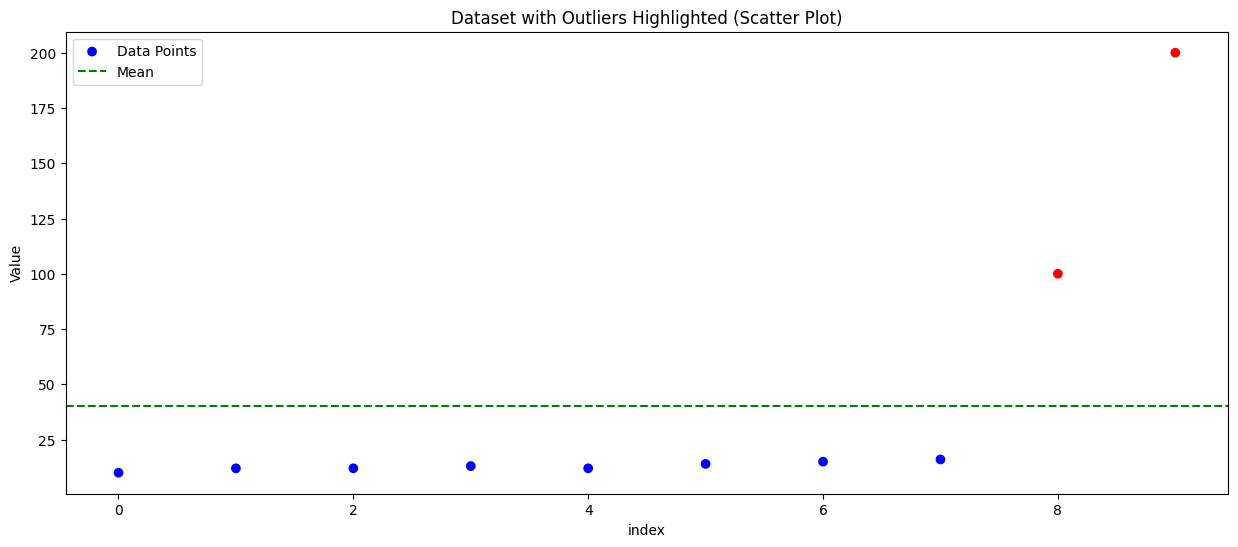

In [58]:
plt.figure(figsize=(15,6))
plt.scatter(range(len(df)),df['Value'],c=['red' if x else 'blue' for x in outliers],label='Data Points')
plt.axhline(y=df['Value'].mean(),color='green',linestyle='--',label='Mean')
plt.title('Dataset with Outliers Highlighted (Scatter Plot)')
plt.xlabel('index')
plt.ylabel('Value')
plt.legend()
plt.show()

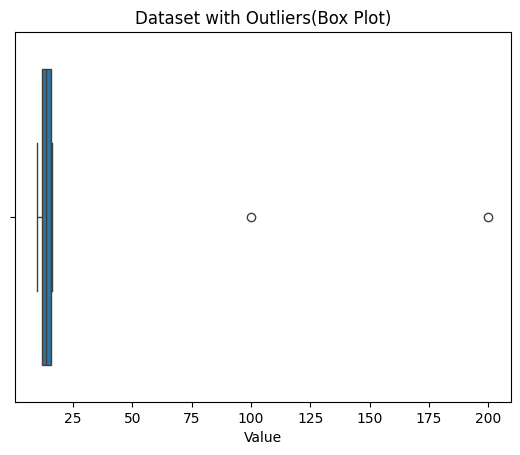

In [56]:
sns.boxplot(x=df['Value'])
plt.title('Dataset with Outliers(Box Plot)')
plt.show()